<a href="https://colab.research.google.com/github/Vyoma-garg/Deep_Learning/blob/main/9_Cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

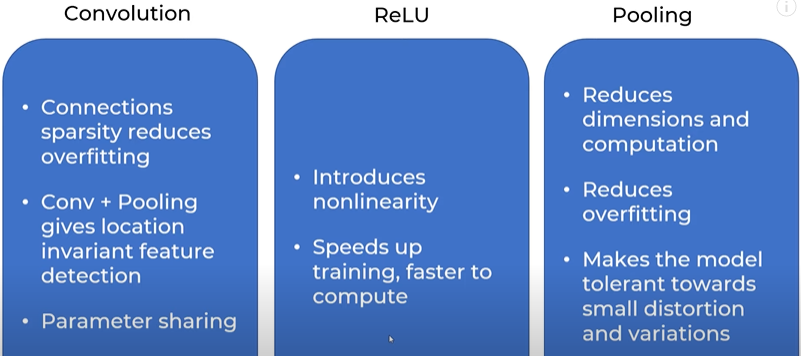

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
(x_train,y_train), (x_test,y_test)= tf.keras.datasets.cifar10.load_data()
x_train.shape

170508288/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

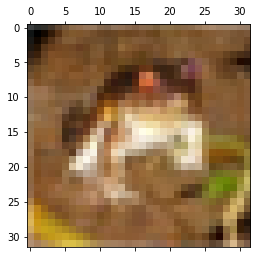

In [4]:
plt.matshow(x_train[0])

In [5]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [20]:
y_train= y_train.reshape(-1,)
y_train[:5]

y_test= y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [10]:
classes[y_train[0]]

'frog'

In [11]:
x_train= x_train/255
x_test= x_test/255

In [13]:
ann= keras.Sequential([
                         keras.layers.Flatten(input_shape=(32,32,3)),
                         keras.layers.Dense(3000, activation='relu'),
                         keras.layers.Dense(1000, activation='relu'),
                         keras.layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.fit(x_train, y_train, epochs =5)


Epoch 1/5
1563/1563 [==============================] - 105s 66ms/step - loss: 1.9039 - accuracy: 0.3250
Epoch 2/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.6651 - accuracy: 0.4025
Epoch 3/5
1563/1563 [==============================] - 107s 69ms/step - loss: 1.5809 - accuracy: 0.4337
Epoch 4/5
1563/1563 [==============================] - 104s 67ms/step - loss: 1.5323 - accuracy: 0.4520
Epoch 5/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.4941 - accuracy: 0.4653


In [14]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 7s 20ms/step - loss: 1.4894 - accuracy: 0.4749


[1.4893869161605835, 0.4749000072479248]

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred= ann.predict(x_test)
y_pred_classes= [np.argmax(elemnt) for elemnt in y_pred]
print("classification_report", classification_report(y_test, y_pred_classes))

classification_report               precision    recall  f1-score   support

           0       0.62      0.43      0.51      1000
           1       0.65      0.54      0.59      1000
           2       0.36      0.34      0.35      1000
           3       0.32      0.43      0.37      1000
           4       0.43      0.43      0.43      1000
           5       0.45      0.18      0.26      1000
           6       0.41      0.69      0.51      1000
           7       0.57      0.50      0.53      1000
           8       0.58      0.64      0.61      1000
           9       0.51      0.57      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.47     10000
weighted avg       0.49      0.47      0.47     10000



In [18]:
cnn= keras.Sequential([
              #cnn
              keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
              keras.layers.MaxPooling2D((2,2)),
              
              keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
              keras.layers.MaxPooling2D((2,2)),

              #dense
              keras.layers.Flatten(),
              keras.layers.Dense(64, activation='relu'),
              keras.layers.Dense(10, activation='softmax')
])


cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4677 - accuracy: 0.4717
Epoch 2/5
1563/1563 [==============================] - 51s 32ms/step - loss: 1.1123 - accuracy: 0.6121
Epoch 3/5
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9910 - accuracy: 0.6570
Epoch 4/5
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9139 - accuracy: 0.6841
Epoch 5/5
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8473 - accuracy: 0.7079


In [19]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9451 - accuracy: 0.6772


[0.9451390504837036, 0.6772000193595886]

cat


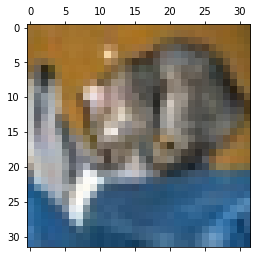

In [21]:
plt.matshow(x_test[0])
print(classes[y_test[0]])

In [23]:
y_pred= cnn.predict(x_test)

y_pred_classes= [np.argmax(elemnt) for elemnt in y_pred]

classes[y_pred_classes[0]]


'cat'

In [24]:
print("classification_report", classification_report(y_test, y_pred_classes))

classification_report               precision    recall  f1-score   support

           0       0.63      0.79      0.70      1000
           1       0.85      0.75      0.80      1000
           2       0.52      0.57      0.55      1000
           3       0.60      0.36      0.45      1000
           4       0.56      0.70      0.63      1000
           5       0.68      0.47      0.56      1000
           6       0.77      0.77      0.77      1000
           7       0.70      0.75      0.72      1000
           8       0.75      0.83      0.79      1000
           9       0.75      0.79      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



## PADDING , STRIDES

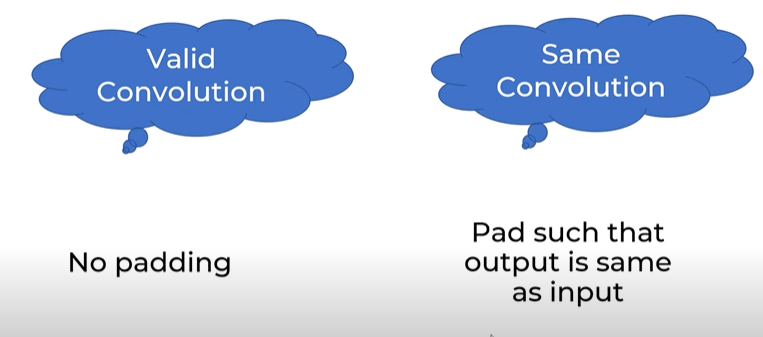

In [25]:
cnn= keras.Sequential([
              #cnn
              keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', input_shape=(32,32,3)),
              keras.layers.MaxPooling2D((2,2)),
              
              keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(2,2), padding='same', activation='relu'),
              keras.layers.MaxPooling2D((2,2)),

              #dense
              keras.layers.Flatten(),
              keras.layers.Dense(64, activation='relu'),
              keras.layers.Dense(10, activation='softmax')
])


cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 17s 10ms/step - loss: 1.6644 - accuracy: 0.3920
Epoch 2/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3443 - accuracy: 0.5142
Epoch 3/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2265 - accuracy: 0.5616
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1489 - accuracy: 0.5906
Epoch 5/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0881 - accuracy: 0.6132
